In [603]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [604]:
from sklearn.preprocessing import StandardScaler

In [753]:
sgemm_product = pd.read_csv("C:\\Users\\14692\\Documents\\Python\\sgemm_product_dataset\\sgemm_product.csv")
sgemm_product.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [754]:
sgemm_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [755]:
sgemm_product.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


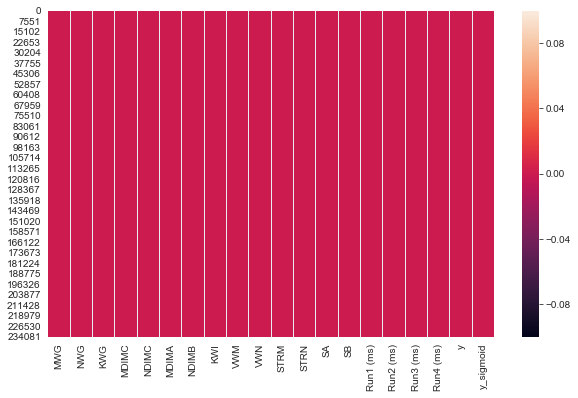

In [1084]:
plt.figure(figsize=(10,6))
sns.heatmap(sgemm_product.isnull())

In [756]:
for i in sgemm_product.columns:
    print(i,sgemm_product[i].unique())

MWG [ 16  32  64 128]
NWG [ 16  32  64 128]
KWG [16 32]
MDIMC [ 8 16 32]
NDIMC [ 8 16 32]
MDIMA [ 8 16 32]
NDIMB [ 8 16 32]
KWI [2 8]
VWM [1 2 4 8]
VWN [1 2 4 8]
STRM [0 1]
STRN [0 1]
SA [0 1]
SB [0 1]
Run1 (ms) [115.26  78.13  79.84 ...  26.27  26.4  144.61]
Run2 (ms) [115.87  78.25  80.69 ... 256.13 155.21  17.79]
Run3 (ms) [118.55  79.25  80.76 ... 122.68  17.31  17.78]
Run4 (ms) [115.8   79.19  80.97 ... 157.27 263.33  27.12]


In [757]:
sgemm_product['y']=sgemm_product[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)','Run4 (ms)']].mean(axis=1)
sgemm_product

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),y
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77,17.77,17.8175
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04,36.03,36.0350
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27,35.27,35.1600
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44,28.45,28.4525


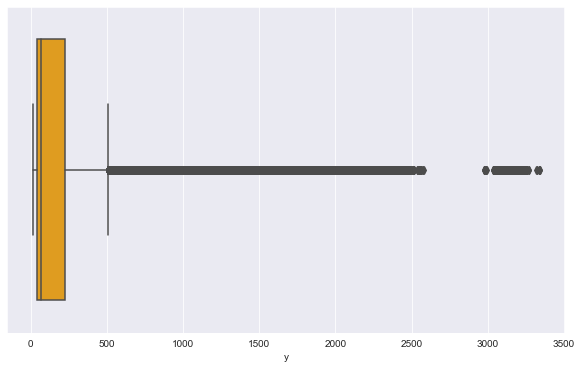

In [1081]:
plt.figure(figsize=(10,6))
import seaborn as sns
sns.boxplot(sgemm_product['y'], color='orange')

In [759]:
sgemm_product1=sgemm_product[sgemm_product['y']<=1000]
sgemm_product1

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),y
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77,17.77,17.8175
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04,36.03,36.0350
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27,35.27,35.1600
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44,28.45,28.4525


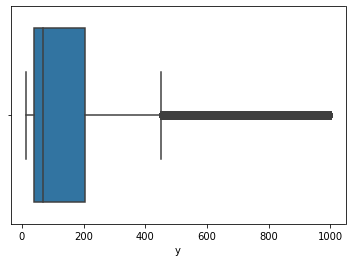

In [760]:
import seaborn as sns
sns.boxplot(sgemm_product1['y'])

In [1092]:
(sgemm_product.shape[0]-sgemm_product1.shape[0])*100/sgemm_product.shape[0]

3.5422185430463577

3.5422 % of the data is removed as outlier

In [761]:
test_scaling=sgemm_product1.drop(['Run1 (ms)', 'Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis=1)
test_scaling

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,y
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.8175
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.0350
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.1600
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.4525


In [762]:
test_scaling.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'y'],
      dtype='object')

In [763]:
list1=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN']
dummy_var_list=['STRM', 'STRN', 'SA', 'SB']

In [764]:
test_scaling[list1]

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN
0,16,16,16,8,8,8,8,2,1,1
1,16,16,16,8,8,8,8,2,1,1
2,16,16,16,8,8,8,8,2,1,1
3,16,16,16,8,8,8,8,2,1,1
4,16,16,16,8,8,8,8,2,1,1
...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4
241596,128,128,32,32,32,32,32,8,4,4
241597,128,128,32,32,32,32,32,8,4,4
241598,128,128,32,32,32,32,32,8,4,4


In [765]:
test_dummy_var=test_scaling[dummy_var_list]
test_dummy_var

,STRM,STRN,SA,SB
0,0,0,0,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,1
4,0,1,0,0
...,...,...,...,...
241595,1,0,1,1
241596,1,1,0,0
241597,1,1,0,1
241598,1,1,1,0


In [766]:
test_dummy_var=pd.concat([pd.get_dummies(test_dummy_var[col], prefix=col,prefix_sep="_") for col in test_dummy_var], axis=1)
test_dummy_var

,STRM_0,STRM_1,STRN_0,STRN_1,SA_0,SA_1,SB_0,SB_1
0,1,0,1,0,1,0,1,0
1,1,0,1,0,1,0,0,1
2,1,0,1,0,0,1,1,0
3,1,0,1,0,0,1,0,1
4,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...
241595,0,1,1,0,0,1,0,1
241596,0,1,0,1,1,0,1,0
241597,0,1,0,1,1,0,0,1
241598,0,1,0,1,0,1,1,0


In [767]:
new_test_dummy_var=pd.concat([test_dummy_var, test_scaling], axis=1)
new_test_dummy_var=new_test_dummy_var.drop(dummy_var_list, axis=1)

In [768]:
new_test_dummy_var=new_test_dummy_var.drop(['y'], axis=1)
new_test_dummy_var

,STRM_0,STRM_1,STRN_0,STRN_1,SA_0,SA_1,SB_0,SB_1,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN
0,1,0,1,0,1,0,1,0,16,16,16,8,8,8,8,2,1,1
1,1,0,1,0,1,0,0,1,16,16,16,8,8,8,8,2,1,1
2,1,0,1,0,0,1,1,0,16,16,16,8,8,8,8,2,1,1
3,1,0,1,0,0,1,0,1,16,16,16,8,8,8,8,2,1,1
4,1,0,0,1,1,0,1,0,16,16,16,8,8,8,8,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,0,1,1,0,0,1,0,1,128,128,32,32,32,32,32,8,4,4
241596,0,1,0,1,1,0,1,0,128,128,32,32,32,32,32,8,4,4
241597,0,1,0,1,1,0,0,1,128,128,32,32,32,32,32,8,4,4
241598,0,1,0,1,0,1,1,0,128,128,32,32,32,32,32,8,4,4


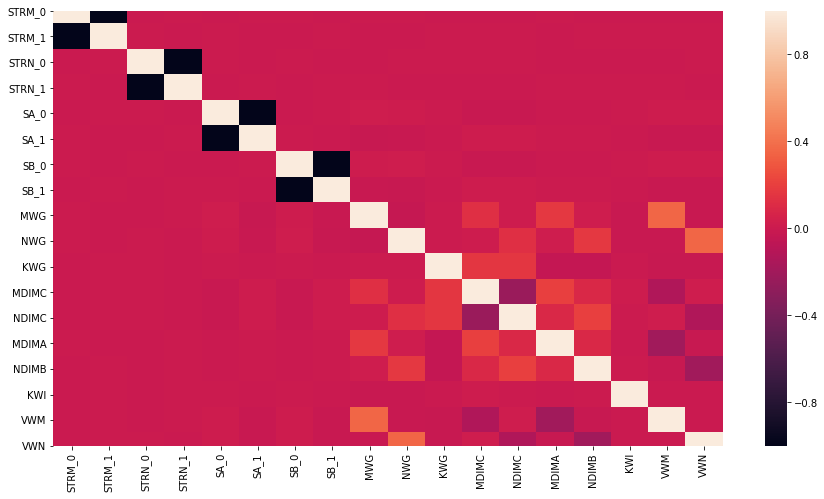

In [769]:
plt.figure(figsize=(15,8))
sns.heatmap(new_test_dummy_var.corr())

In [1087]:
sgemm_product1['y']

0         116.3700
1          78.7050
2          80.5650
3          86.6375
4         118.6625
            ...   
241595     17.8175
241596     36.0350
241597     35.1600
241598     28.4525
241599     17.8175
Name: y, Length: 233042, dtype: float64

In [1101]:
X=new_test_dummy_var
y=np.log(sgemm_product1['y'])

In [1102]:
from sklearn.model_selection import train_test_split

In [1103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1104]:
X_train.shape

(163129, 18)

In [1105]:
sgemm_product1['y'].mean()

161.92957303833856

In [1106]:
X_test.shape

(69913, 18)

In [1107]:
XTrainMatrix=np.array(X_train)
yTrainMatrix=np.array(y_train)
XTestMatrix=np.array(X_test)
yTestMatrix=np.array(y_test)

In [1108]:
def normaliseData(X):
    scaler=StandardScaler().fit(X)
    Xnorm=scaler.transform(X)
    return Xnorm

In [1109]:
X_train_norm=normaliseData(XTrainMatrix)
X_train_norm=np.hstack((np.ones((X_train_norm.shape[0],1)),X_train_norm))

X_test_norm=normaliseData(XTestMatrix)
X_test_norm=np.hstack((np.ones((X_test_norm.shape[0],1)),X_test_norm))
X_test_norm

array([[ 1.        , -0.99809944,  0.99809944, ..., -0.98699684,
        -0.73838992, -0.2128538 ],
       [ 1.        , -0.99809944,  0.99809944, ...,  1.01317447,
        -0.73838992, -0.2128538 ],
       [ 1.        ,  1.00190418, -1.00190418, ...,  1.01317447,
        -0.73838992, -0.73366884],
       ...,
       [ 1.        ,  1.00190418, -1.00190418, ..., -0.98699684,
        -0.2201538 , -0.2128538 ],
       [ 1.        ,  1.00190418, -1.00190418, ..., -0.98699684,
        -0.2201538 , -0.2128538 ],
       [ 1.        , -0.99809944,  0.99809944, ...,  1.01317447,
        -0.2201538 , -0.73366884]])

In [1113]:
X_test_norm

array([[ 1.        , -0.99809944,  0.99809944, ..., -0.98699684,
        -0.73838992, -0.2128538 ],
       [ 1.        , -0.99809944,  0.99809944, ...,  1.01317447,
        -0.73838992, -0.2128538 ],
       [ 1.        ,  1.00190418, -1.00190418, ...,  1.01317447,
        -0.73838992, -0.73366884],
       ...,
       [ 1.        ,  1.00190418, -1.00190418, ..., -0.98699684,
        -0.2201538 , -0.2128538 ],
       [ 1.        ,  1.00190418, -1.00190418, ..., -0.98699684,
        -0.2201538 , -0.2128538 ],
       [ 1.        , -0.99809944,  0.99809944, ...,  1.01317447,
        -0.2201538 , -0.73366884]])

In [1114]:
X_train_norm.shape

(163129, 19)

In [1115]:
X_test_norm.shape

(69913, 19)

In [1116]:
XtrainMatrix= np.matrix(X_train_norm) 
yTrain = np.matrix(yTrainMatrix).T

In [1117]:
XtestMatrix = np.matrix(X_test_norm)  
yTest = np.matrix(yTestMatrix).T

In [1118]:
def cost_func(X,y,theta):
    error=np.power(((X @ theta.T) - y), 2)
    return np.sum(error) / (2 * len(X))

### Gradient Descent

In [1121]:
def gradientDescent(Xtrain, ytrain,Xtest,ytest, theta, alpha, iters,threshold=0.001):
#     rmse=[]
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.shape[1])
    trainCost = np.zeros(iters)
    testCost=np.zeros(iters)
    for i in range(iters):
        error=(Xtrain * theta.T) - ytrain
        
        for j in range(parameters):
            term=np.multiply(error, Xtrain[:,j])
            temp[0,j]=theta[0,j] - ((alpha / len(Xtrain)) * np.sum(term))    
        theta=temp
        trainCost[i]=cost_func(Xtrain, ytrain, theta)
        testCost[i]=cost_func(Xtest,ytest,theta)
#         rmse.append((np.sqrt(np.power(((Xtrain * theta.T) - y), 2).mean())))
        
        if i!=0 and trainCost[i-1]-trainCost[i]<threshold:
            print('Converged in ',str(i),' iterations.')
            break
        
    return theta,trainCost,testCost,error,i

In [1122]:
def plot_LearningCurve(trainCost,testCost):
    size=trainCost.size-trainCost[trainCost==0].size-1
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(list(range(0,size)), trainCost[0:size], 'b')
    ax.plot(list(range(0,size)), testCost[0:size], 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Training/Testing Cost VS Iterations')

In [1143]:
iterations=10000
# Remove values from alpha list and generate the below plot for rmse and alpha
alpha_list=[0.001,0.002,0.003,0.004,0.005,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.9,1]
theta=np.ones((XtrainMatrix.shape[1],1)).T
# x=np.array()
# cc=np.array(len(alpha_list))
Er=[]
th=[]
trainC=[]
testC=[]
itr=[]
cc=[]
for i in alpha_list:
    theta=np.ones((XtrainMatrix.shape[1],1)).T
    print('printing for alpha:',i)
    theta,trainCost,testCost,Error,i= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,i,iterations,0.00001)
    th.append(theta)
    trainC.append(trainCost)
    testC.append(testCost)
    Er.append(Error)
    itr.append(i)
    cc.append(cost_func(XtrainMatrix,yTrain,theta))

printing for alpha: 0.001
Converged in  4245  iterations.
printing for alpha: 0.002
Converged in  2404  iterations.
printing for alpha: 0.003
Converged in  1720  iterations.
printing for alpha: 0.004
Converged in  1355  iterations.
printing for alpha: 0.005
Converged in  1125  iterations.
printing for alpha: 0.01
Converged in  628  iterations.
printing for alpha: 0.02
Converged in  348  iterations.
printing for alpha: 0.03
Converged in  245  iterations.
printing for alpha: 0.04
Converged in  190  iterations.
printing for alpha: 0.05
Converged in  157  iterations.
printing for alpha: 0.1
Converged in  84  iterations.
printing for alpha: 0.2
Converged in  45  iterations.
printing for alpha: 0.3
Converged in  30  iterations.
printing for alpha: 0.4
Converged in  23  iterations.
printing for alpha: 0.5
Converged in  18  iterations.
printing for alpha: 0.6
Converged in  15  iterations.
printing for alpha: 0.8
Converged in  11  iterations.
printing for alpha: 0.9
Converged in  13  iterations

In [1156]:
trainC1=pd.DataFrame(trainC)

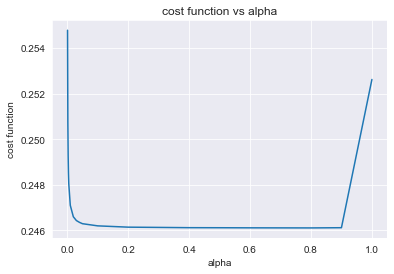

In [1325]:
plt.plot(alpha_list,cc)
plt.xlabel("alpha")
plt.ylabel("cost function")
plt.title("cost function vs alpha")
plt.show()

It shows that the alpha value overshoots after 0.9 value of alpha

In [1181]:
#Cost function and alpha Dataframe
pd.DataFrame(cc,alpha_list)

,0
0.001,0.254773
0.002,0.250724
0.003,0.249273
0.004,0.248516
0.005,0.248054
0.010,0.247099
0.020,0.246598
0.030,0.246431
0.040,0.246352
0.050,0.246293


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


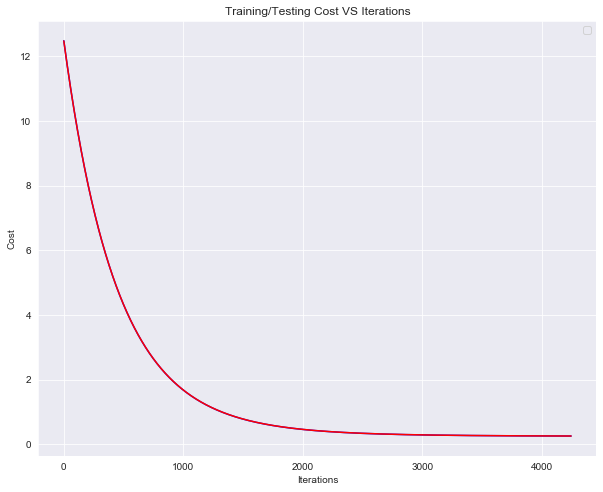

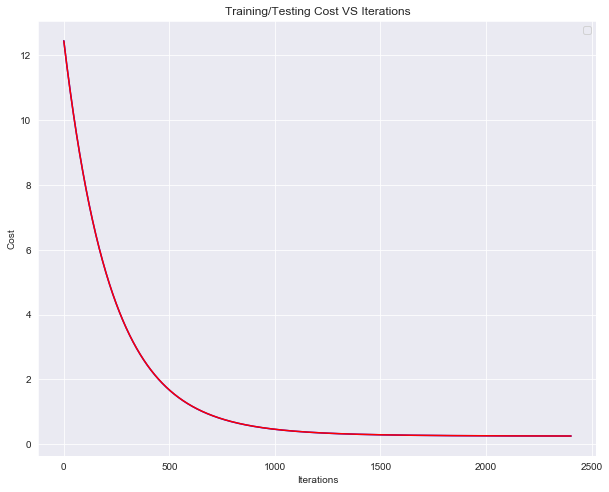

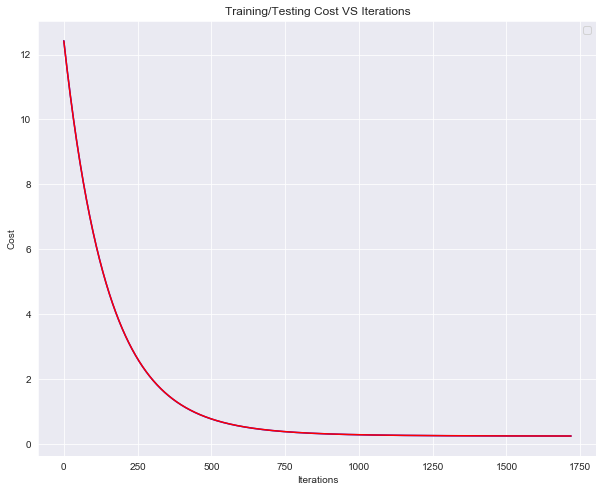

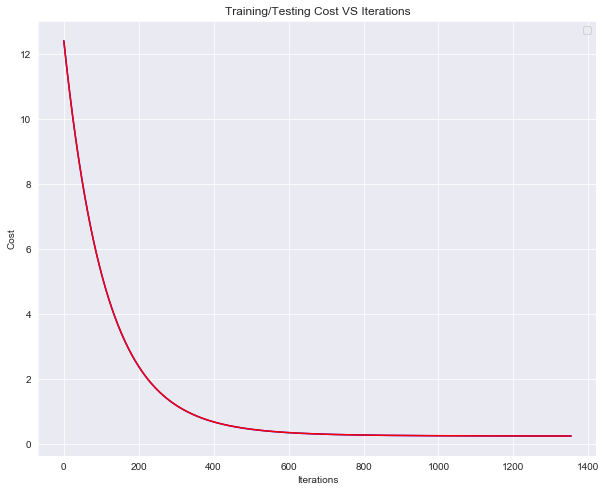

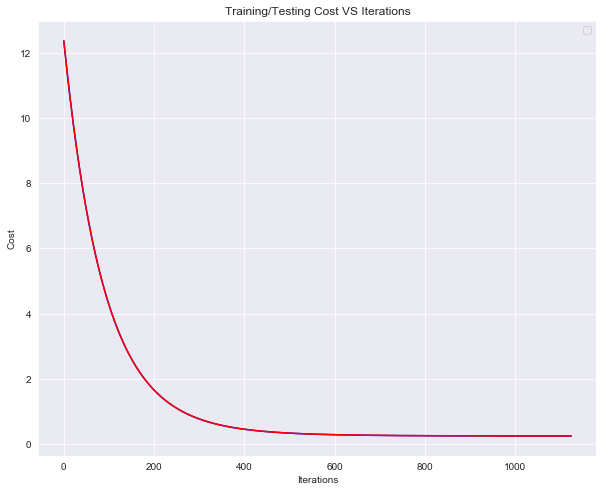

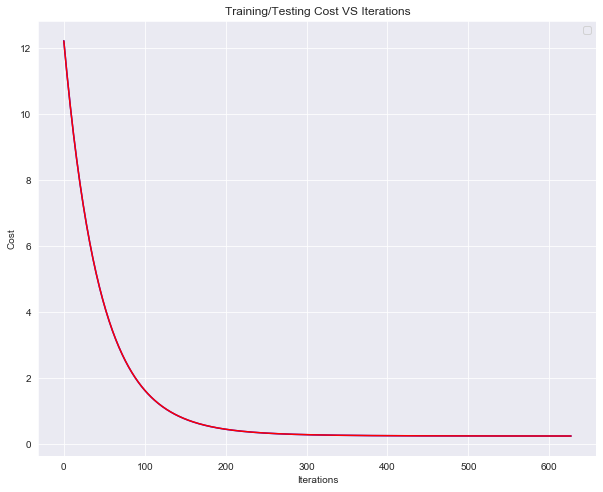

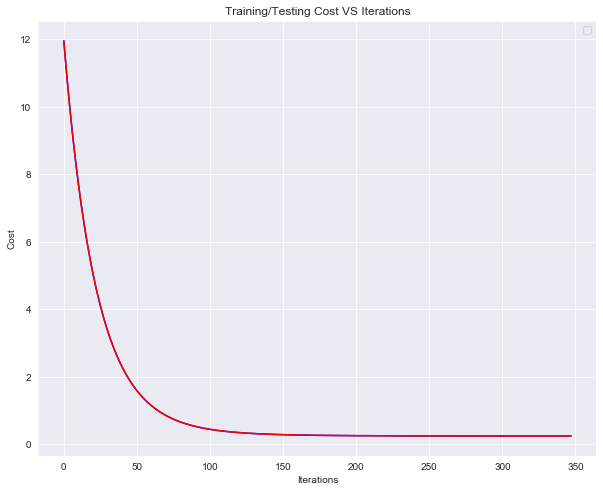

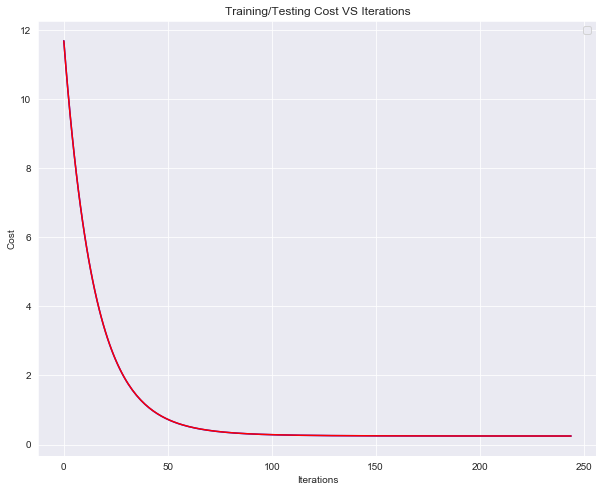

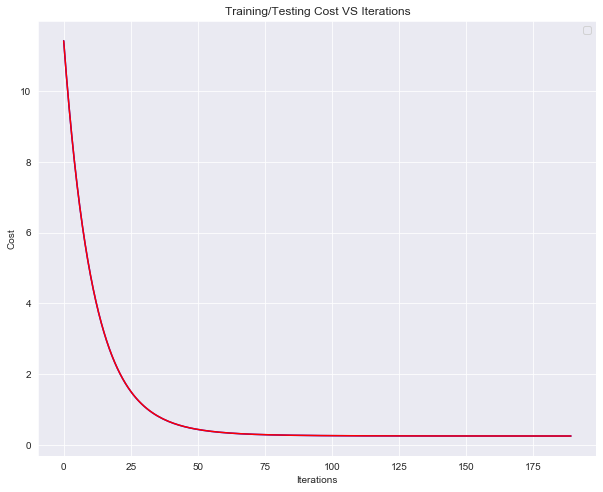

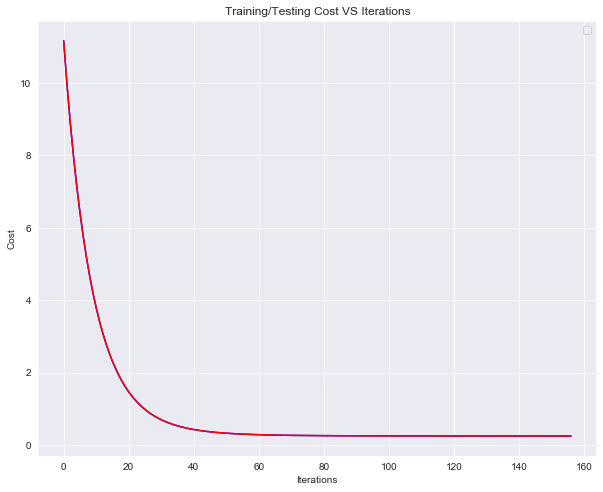

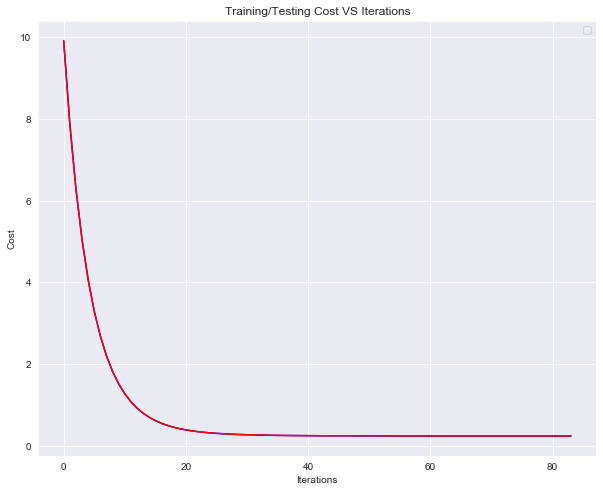

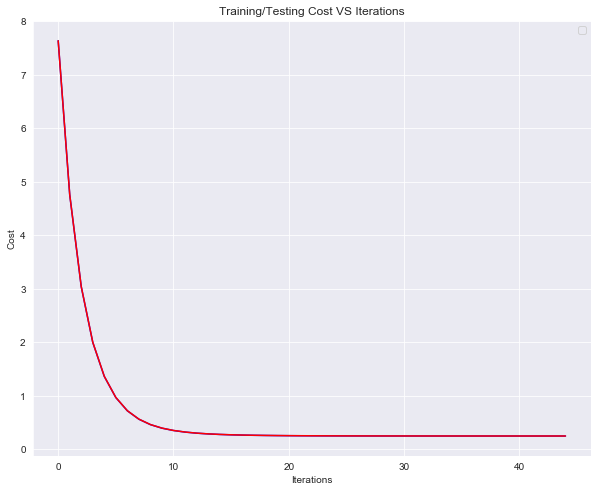

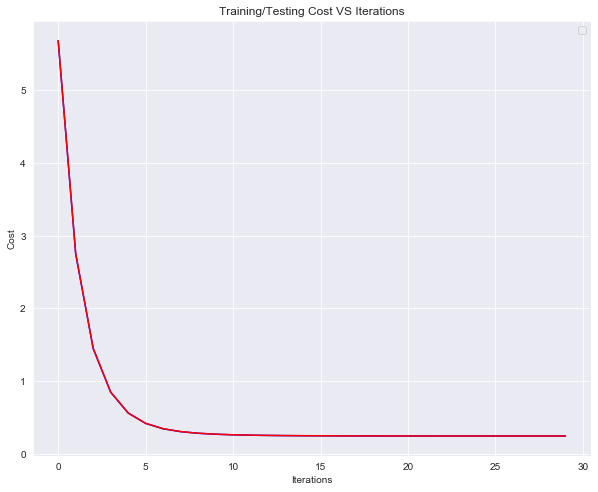

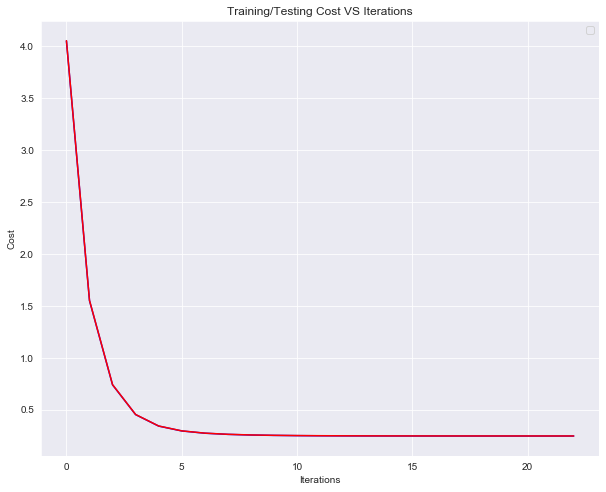

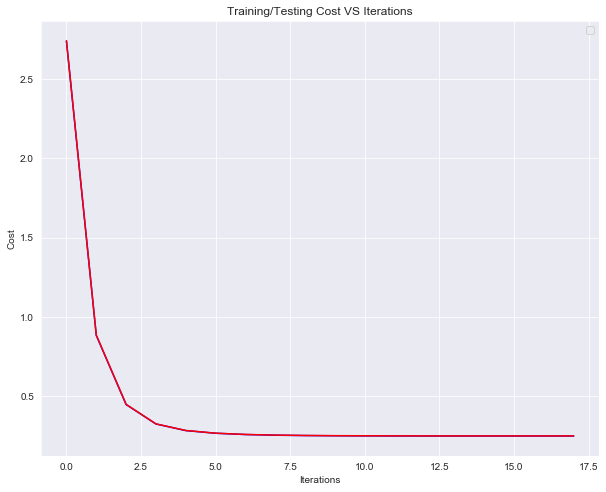

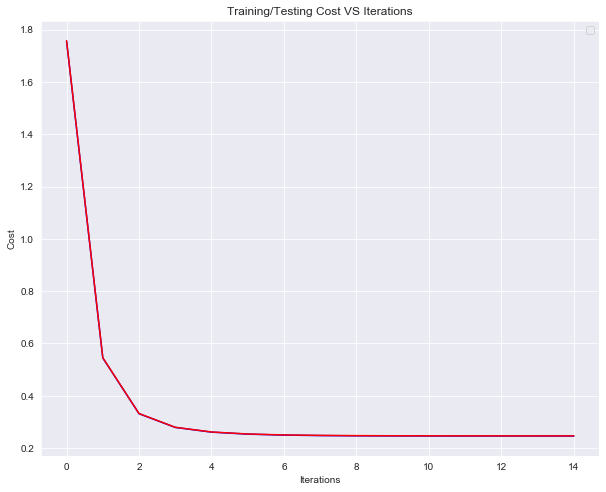

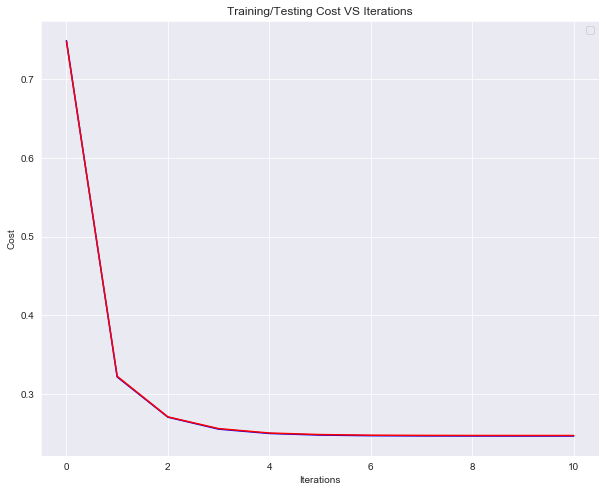

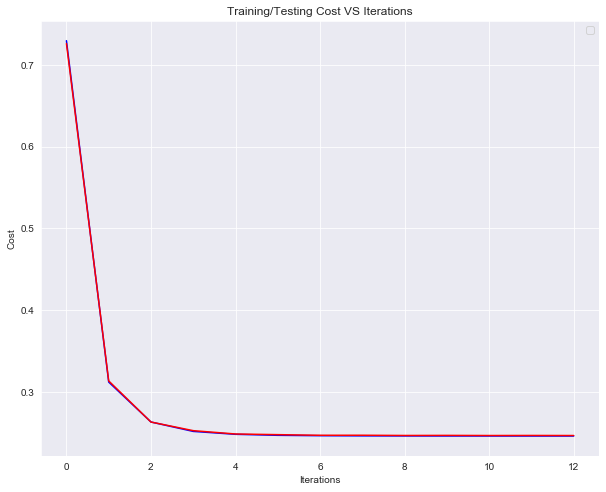

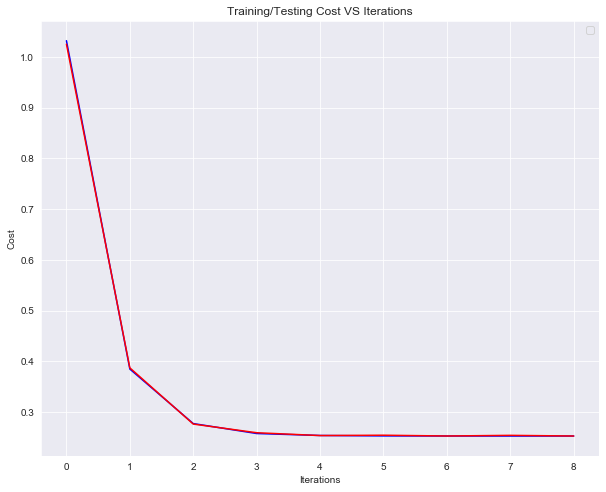

In [1216]:
#Cost function vs iteration graph for different values of alpha
for i in range(0,len(trainC)):
    plot_LearningCurve(trainC[i],testC[i])
    plt.legend()

### Experiment 2:

In [1210]:
#gradient descent at different values of threshold
iterations=5000
threshold=[0.0000000001,0.0000000005,0.000000001,0.000000005,0.00000001,0.00000005,0.0000001,0.0000005,0.000001,0.000005
           ,0.00001,0.00005]
Er_t=[]
th_t=[]
trainC_t=[]
testC_t=[]
itr_t=[]
cc_t=[]
for j in threshold:
    theta=np.ones((XtrainMatrix.shape[1],1)).T
    print('printing for threshold:',i,j)
    theta,trainCost,testCost,Error,i= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,0.1,iterations,j)
    th_t.append(theta)
    trainC_t.append(trainCost)
    testC_t.append(testCost)
    Er_t.append(Error)
    itr_t.append(i)
    cc_t.append(computeCost(XtrainMatrix,yTrain,theta))
#

printing for threshold: 84 1e-10
Converged in  200  iterations.
printing for threshold: 200 5e-10
Converged in  184  iterations.
printing for threshold: 184 1e-09
Converged in  177  iterations.
printing for threshold: 177 5e-09
Converged in  161  iterations.
printing for threshold: 161 1e-08
Converged in  154  iterations.
printing for threshold: 154 5e-08
Converged in  137  iterations.
printing for threshold: 137 1e-07
Converged in  131  iterations.
printing for threshold: 131 5e-07
Converged in  114  iterations.
printing for threshold: 114 1e-06
Converged in  107  iterations.
printing for threshold: 107 5e-06
Converged in  91  iterations.
printing for threshold: 91 1e-05
Converged in  84  iterations.
printing for threshold: 84 5e-05
Converged in  68  iterations.


In [1246]:
experiment2_linear={'threshold':[0.0000000001,0.0000000005,0.000000001,0.000000005,0.00000001,0.00000005,0.0000001,0.0000005,0.000001,0.000005
           ,0.00001,0.00005],'cost_func':[0.2461046950232692,
 0.2461046985664855,
 0.2461047030426265,
 0.24610473794633372,
 0.24610478205650171,
 0.24610517140734456,
 0.24610556129534608,
 0.24610940436575718,
 0.24611415116347402,
 0.24615125244486405,
 0.24619826362060807,
 0.24656834242274875],'Iterations':[200,184,177,161,154,137,131,114,107,91,84,68] ,
                    }
experiment2_linear=pd.DataFrame(experiment2_linear)
experiment2_linear['% change']=experiment2_linear["cost_func"].pct_change()
experiment2_linear

,threshold,cost_func,Iterations,% change
0,1.000000e-10,0.246105,200,NaN
1,5.000000e-10,0.246105,184,1.439719e-08
2,1.000000e-09,0.246105,177,1.818795e-08
3,5.000000e-09,0.246105,161,1.418246e-07
4,1.000000e-08,0.246105,154,1.792333e-07
5,5.000000e-08,0.246105,137,1.582053e-06
6,1.000000e-07,0.246106,131,1.584233e-06
7,5.000000e-07,0.246109,114,1.561554e-05
8,1.000000e-06,0.246114,107,1.928735e-05
9,5.000000e-06,0.246151,91,1.507483e-04


Table for threshold, cost function, converged value of iterations and percent change in the threshold.

Converged in  15  iterations.


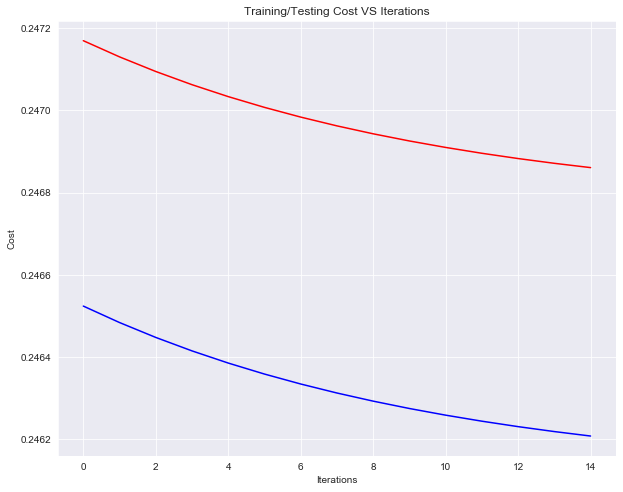

In [1248]:
theta_10,trainCost_10,testCost_10,Error_10,i_10= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,0.1,iterations,0.00001)
plot_LearningCurve(trainCost_10,testCost_10)



### Above figure shows minute difference in the cost functions of train and test sets

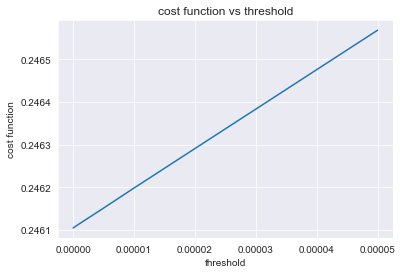

In [1214]:
plt.plot(threshold,cc_t)
plt.xlabel("threshold")
plt.ylabel("cost function")
plt.title("cost function vs threshold")
plt.show()

In [ ]:

for i in alpha_list:
    theta=np.ones((XtrainMatrix.shape[1],1)).T
    print('printing for alpha:',i)
    theta,trainCost,testCost,Error,i= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,i,iterations,0.00001)
    th.append(theta)
    trainC.append(trainCost)
    testC.append(testCost)
    Er.append(Error)
    itr.append(i)
    cc.append(cost_func(XtrainMatrix,yTrain,theta))

### Experiment 3:

In [ ]:
X=new_test_dummy_var
y=np.log(sgemm_product1['y'])

In [1259]:
x_random=['STRM_0', 'STRM_1', 'SA_0', 'SA_1','MWG', 'NWG', 'KWG', 'NDIMC', 'MDIMA','KWI', 'VWM','VWN']
X_Random=X[x_random]
X_Random

,STRM_0,STRM_1,SA_0,SA_1,MWG,NWG,KWG,NDIMC,MDIMA,KWI,VWM,VWN
0,1,0,1,0,16,16,16,8,8,2,1,1
1,1,0,1,0,16,16,16,8,8,2,1,1
2,1,0,0,1,16,16,16,8,8,2,1,1
3,1,0,0,1,16,16,16,8,8,2,1,1
4,1,0,1,0,16,16,16,8,8,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
241595,0,1,0,1,128,128,32,32,32,8,4,4
241596,0,1,1,0,128,128,32,32,32,8,4,4
241597,0,1,1,0,128,128,32,32,32,8,4,4
241598,0,1,0,1,128,128,32,32,32,8,4,4


In [1010]:
y

0         4.756775
1         4.365707
2         4.389064
3         4.461733
4         4.776283
            ...   
241595    2.880181
241596    3.584491
241597    3.559909
241598    3.348236
241599    2.880181
Name: y, Length: 233042, dtype: float64

In [1260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Random, y, test_size=0.3, random_state=42)
X_train.shape
X_test.shape

XTrainMatrix=np.array(X_train)
yTrainMatrix=np.array(y_train)
XTestMatrix=np.array(X_test)
yTestMatrix=np.array(y_test)

def normaliseData(X):
    scaler=StandardScaler().fit(X)
    Xnorm=scaler.transform(X)
    return Xnorm

X_train_norm=normaliseData(XTrainMatrix)
X_train_norm=np.hstack((np.ones((X_train_norm.shape[0],1)),X_train_norm))

X_test_norm=normaliseData(XTestMatrix)
X_test_norm=np.hstack((np.ones((X_test_norm.shape[0],1)),X_test_norm))
X_test_norm

X_train_norm.shape
X_test_norm.shape

XtrainMatrix= np.matrix(X_train_norm) 
yTrain = np.matrix(yTrainMatrix).T

XtestMatrix = np.matrix(X_test_norm)  
yTest = np.matrix(yTestMatrix).T

In [1262]:
XtrainMatrix

matrix([[ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
         -0.73564658, -0.2191107 ],
        [ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
         -0.21710392, -0.2191107 ],
        [ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
          0.8199814 , -0.73678456],
        ...,
        [ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
          0.8199814 , -0.73678456],
        [ 1.        ,  0.99906253, -0.99906253, ..., -0.98673051,
          0.8199814 , -0.73678456],
        [ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
         -0.73564658,  0.81623702]])

In [1263]:
XtrainMatrix

matrix([[ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
         -0.73564658, -0.2191107 ],
        [ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
         -0.21710392, -0.2191107 ],
        [ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
          0.8199814 , -0.73678456],
        ...,
        [ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
          0.8199814 , -0.73678456],
        [ 1.        ,  0.99906253, -0.99906253, ..., -0.98673051,
          0.8199814 , -0.73678456],
        [ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
         -0.73564658,  0.81623702]])

In [1264]:
XtrainMatrix.shape

(163129, 13)

In [1266]:
XtestMatrix.shape

(69913, 13)

In [1267]:
X.shape

(233042, 18)

In [1268]:
y.shape

(233042,)

In [1269]:
theta=np.ones((XtrainMatrix.shape[1],1)).T
theta_rnd,trainCost_rnd,testCost_rnd,Error_rnd,i_rnd= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,0.1,iterations,0.00001)
cc_rnd=cost_func(XtrainMatrix,yTrain,theta)
cc_rnd

Converged in  73  iterations.


10.770445351602692

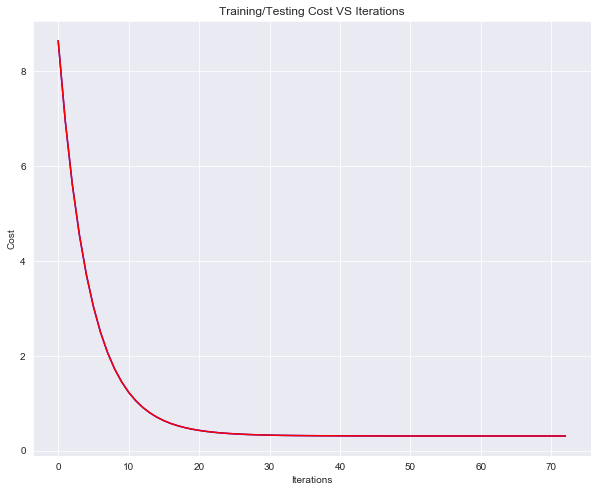

In [1273]:
# plot for training/test for iterations of random variables
plot_LearningCurve(trainCost_rnd,testCost_rnd)

In [1270]:
experiment2_linear

,threshold,cost_func,Iterations,% change
0,1.000000e-10,0.246105,200,NaN
1,5.000000e-10,0.246105,184,1.439719e-08
2,1.000000e-09,0.246105,177,1.818795e-08
3,5.000000e-09,0.246105,161,1.418246e-07
4,1.000000e-08,0.246105,154,1.792333e-07
5,5.000000e-08,0.246105,137,1.582053e-06
6,1.000000e-07,0.246106,131,1.584233e-06
7,5.000000e-07,0.246109,114,1.561554e-05
8,1.000000e-06,0.246114,107,1.928735e-05
9,5.000000e-06,0.246151,91,1.507483e-04


### Thus, it shows that the random chosen variables doesn't give a good result 

## Experiment 4:

In [ ]:
X=new_test_dummy_var
y=np.log(sgemm_product1['y'])

In [1276]:
X.columns

Index(['STRM_0', 'STRM_1', 'STRN_0', 'STRN_1', 'SA_0', 'SA_1', 'SB_0', 'SB_1',
       'MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN'],
      dtype='object')

In [1317]:
X

,STRM_0,STRM_1,STRN_0,STRN_1,SA_0,SA_1,SB_0,SB_1,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN
0,1,0,1,0,1,0,1,0,16,16,16,8,8,8,8,2,1,1
1,1,0,1,0,1,0,0,1,16,16,16,8,8,8,8,2,1,1
2,1,0,1,0,0,1,1,0,16,16,16,8,8,8,8,2,1,1
3,1,0,1,0,0,1,0,1,16,16,16,8,8,8,8,2,1,1
4,1,0,0,1,1,0,1,0,16,16,16,8,8,8,8,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,0,1,1,0,0,1,0,1,128,128,32,32,32,32,32,8,4,4
241596,0,1,0,1,1,0,1,0,128,128,32,32,32,32,32,8,4,4
241597,0,1,0,1,1,0,0,1,128,128,32,32,32,32,32,8,4,4
241598,0,1,0,1,0,1,1,0,128,128,32,32,32,32,32,8,4,4


In [1318]:
x_choosen=['STRM_0', 'STRM_1', 'STRN_0', 'STRN_1', 'SA_0', 'SA_1', 'SB_0', 'SB_1', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN']
X_choosen=X[x_choosen]
X_choosen

,STRM_0,STRM_1,STRN_0,STRN_1,SA_0,SA_1,SB_0,SB_1,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN
0,1,0,1,0,1,0,1,0,8,8,8,2,1,1
1,1,0,1,0,1,0,0,1,8,8,8,2,1,1
2,1,0,1,0,0,1,1,0,8,8,8,2,1,1
3,1,0,1,0,0,1,0,1,8,8,8,2,1,1
4,1,0,0,1,1,0,1,0,8,8,8,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,0,1,1,0,0,1,0,1,32,32,32,8,4,4
241596,0,1,0,1,1,0,1,0,32,32,32,8,4,4
241597,0,1,0,1,1,0,0,1,32,32,32,8,4,4
241598,0,1,0,1,0,1,1,0,32,32,32,8,4,4


In [1319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_choosen, y, test_size=0.3, random_state=42)
X_train.shape
X_test.shape

XTrainMatrix=np.array(X_train)
yTrainMatrix=np.array(y_train)
XTestMatrix=np.array(X_test)
yTestMatrix=np.array(y_test)

def normaliseData(X):
    scaler=StandardScaler().fit(X)
    Xnorm=scaler.transform(X)
    return Xnorm

X_train_norm=normaliseData(XTrainMatrix)
X_train_norm=np.hstack((np.ones((X_train_norm.shape[0],1)),X_train_norm))

X_test_norm=normaliseData(XTestMatrix)
X_test_norm=np.hstack((np.ones((X_test_norm.shape[0],1)),X_test_norm))
X_test_norm

X_train_norm.shape
X_test_norm.shape

XtrainMatrix= np.matrix(X_train_norm) 
yTrain = np.matrix(yTrainMatrix).T

XtestMatrix = np.matrix(X_test_norm)  
yTest = np.matrix(yTestMatrix).T

In [1320]:
XtrainMatrix

matrix([[ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
         -0.73564658, -0.2191107 ],
        [ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
         -0.21710392, -0.2191107 ],
        [ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
          0.8199814 , -0.73678456],
        ...,
        [ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
          0.8199814 , -0.73678456],
        [ 1.        ,  0.99906253, -0.99906253, ..., -0.98673051,
          0.8199814 , -0.73678456],
        [ 1.        , -1.00093835,  1.00093835, ..., -0.98673051,
         -0.73564658,  0.81623702]])

In [1321]:
XtestMatrix

matrix([[ 1.        , -0.99809944,  0.99809944, ..., -0.98699684,
         -0.73838992, -0.2128538 ],
        [ 1.        , -0.99809944,  0.99809944, ...,  1.01317447,
         -0.73838992, -0.2128538 ],
        [ 1.        ,  1.00190418, -1.00190418, ...,  1.01317447,
         -0.73838992, -0.73366884],
        ...,
        [ 1.        ,  1.00190418, -1.00190418, ..., -0.98699684,
         -0.2201538 , -0.2128538 ],
        [ 1.        ,  1.00190418, -1.00190418, ..., -0.98699684,
         -0.2201538 , -0.2128538 ],
        [ 1.        , -0.99809944,  0.99809944, ...,  1.01317447,
         -0.2201538 , -0.73366884]])

In [1322]:
iterations=2000
theta=np.ones((XtrainMatrix.shape[1],1)).T
theta_choosen,trainCost_choosen,testCost_choosen,Error_choosen,i_choosen= gradientDescent(XtrainMatrix,yTrain,XtestMatrix,yTest,theta,0.1,iterations,0.00001)
cc_choosen=cost_func(XtrainMatrix,yTrain,theta)
cc_choosen

Converged in  61  iterations.


9.523293528164253

In [1323]:
(10.770445351602692-9.523293528164253)/9.523293528164253

0.13095803670758488

### There is 13.09% decrease in the value of cost function when variables were choosen on some critera instead of randomly selected

# Logistic Regression

In [1326]:
log_test_scaling=sgemm_product.drop(['Run1 (ms)', 'Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis=1)
log_test_scaling

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,y,y_sigmoid
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050,0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375,0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.8175,0
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.0350,0
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.1600,0
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.4525,0


In [1327]:
y_hat=np.log(sgemm_product['y'])
y_mean=np.log(sgemm_product['y']).mean()
print("mean of y after taking log is coming to be",y_mean)
    
sgemm_product["y_sigmoid"]=np.log(sgemm_product['y']).apply(lambda y_hat : 1 if y_hat> 4.623067968587768 else 0)

mean of y after taking log is coming to be 4.623067968587768


In [1328]:
log_test_scaling[list1]

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN
0,16,16,16,8,8,8,8,2,1,1
1,16,16,16,8,8,8,8,2,1,1
2,16,16,16,8,8,8,8,2,1,1
3,16,16,16,8,8,8,8,2,1,1
4,16,16,16,8,8,8,8,2,1,1
...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4
241596,128,128,32,32,32,32,32,8,4,4
241597,128,128,32,32,32,32,32,8,4,4
241598,128,128,32,32,32,32,32,8,4,4


In [1329]:
log_test_scaling[dummy_var_list]

,STRM,STRN,SA,SB
0,0,0,0,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,1
4,0,1,0,0
...,...,...,...,...
241595,1,0,1,1
241596,1,1,0,0
241597,1,1,0,1
241598,1,1,1,0


In [1330]:
sgemm_product_log=sgemm_product[sgemm_product['y']<=1000]
sgemm_product_log

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),y,y_sigmoid
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700,1
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050,0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375,0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77,17.77,17.8175,0
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04,36.03,36.0350,0
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27,35.27,35.1600,0
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44,28.45,28.4525,0


In [1469]:
X=sgemm_product_log.drop(['y','y_sigmoid','Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis=1)

In [1470]:
y_log=sgemm_product_log['y_sigmoid']

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=42)
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (163129, 14)
y_train shape:  (163129,)
X_test shape:  (69913, 14)
y_test shape:  (69913,)


In [1471]:
XTrainMatrix=np.array(X_train)
yTrainMatrix=np.array(y_train)
XTestMatrix=np.array(X_test)
yTestMatrix=np.array(y_test)

In [1472]:
X_train_norm=normaliseData(XTrainMatrix)
X_train_norm=np.hstack((np.ones((X_train_norm.shape[0],1)),X_train_norm))
print(X_train_norm)
X_test_norm=normaliseData(XTestMatrix)
X_test_norm=np.hstack((np.ones((X_test_norm.shape[0],1)),X_test_norm))
print(X_test_norm)

[[ 1.         -1.10658022  1.15309672 ...  0.99497977  1.02307636
   1.02110804]
 [ 1.         -1.10658022  1.15309672 ... -1.00504556  1.02307636
   1.02110804]
 [ 1.          1.15963913 -0.35576307 ...  0.99497977  1.02307636
  -0.9793283 ]
 ...
 [ 1.         -0.35117377  1.15309672 ... -1.00504556  1.02307636
  -0.9793283 ]
 [ 1.          1.15963913 -1.48740792 ... -1.00504556 -0.97744415
   1.02110804]
 [ 1.         -0.35117377  1.15309672 ... -1.00504556  1.02307636
  -0.9793283 ]]
[[ 1.         -1.49374487 -1.10940084 ...  1.01004863  1.0150315
   1.01878525]
 [ 1.         -1.49374487 -0.35325616 ... -0.99005134  1.0150315
  -0.98156112]
 [ 1.         -1.11640098 -1.10940084 ...  1.01004863 -0.9851911
  -0.98156112]
 ...
 [ 1.         -1.11640098 -1.10940084 ... -0.99005134 -0.9851911
  -0.98156112]
 [ 1.         -0.36171321  1.15903321 ...  1.01004863  1.0150315
   1.01878525]
 [ 1.          1.14766235 -1.48747318 ... -0.99005134 -0.9851911
   1.01878525]]


In [1473]:
X_train_norm.shape

(163129, 15)

In [1474]:
X_test_norm.shape

(69913, 15)

In [1475]:
yTrainMatrix

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [1476]:
XtrainMatrix= np.matrix(X_train_norm) 
yTrain = np.matrix(yTrainMatrix).T

In [1477]:
XtestMatrix = np.matrix(X_test_norm)  
yTest = np.matrix(yTestMatrix).T

In [1340]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood (X, y, theta):
    scores = np.dot(X, theta)
    ll = np.sum( y*scores - np.log(1 + np.exp(scores)) )
    return ll

In [1401]:
def logistic_regression1(X, y,learning_rate,iters,threshold=0.00001):
    theta = np.zeros(X.shape[1])
#     parameters=int(theta.shape[1])
#     trainCost = np.zeros(iters)
#     testCost=np.zeros(iters)
    for i in range(iters):
        scores = np.dot(X, theta)
        predictions = sigmoid(scores)

        # Update theta with gradient
        output_error_signal = y - predictions
        gradient = np.dot(X.T, output_error_signal)
        theta += learning_rate * gradient
            
    return theta,trainCost,testCost

In [1402]:
threshold=0.00001
theta,trainCost_log,testCost_log = logistic_regression1(X_train_norm, y_train,0.00005,5000,threshold)
theta

array([-0.9556903 ,  1.98889265,  1.58521205,  0.09222467, -1.48973841,
       -1.32784129, -0.00715871, -0.00681027, -0.01519294, -0.06719502,
       -0.02524679, -0.23669257, -0.00518799, -0.31323412, -0.05075389])

### Comparing with sklearn model

In [1365]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(X_train_norm, y_train)

print(clf.coef_)
print (theta)

[[-0.47784507  1.98890307  1.58520103  0.09222304 -1.48973625 -1.32783232
  -0.00717265 -0.00680165 -0.01519269 -0.06720265 -0.02523245 -0.23669196
  -0.00518794 -0.31323382 -0.05075409]]
[-135.55082182  156.77762278  330.06290416    6.11425067 -245.89307317
 -269.44499683  -11.48581674   -4.33455036   -1.64677423  -87.10875172
   70.35113708  -44.70157558   -0.35722147  -60.04272436  -11.474948  ]


In [1366]:
final_scores = np.dot(X_train_norm, theta)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == y_train).sum().astype(float) / len(preds)))
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_train_norm, y_train)))

Accuracy from scratch: 0.8058898172611859
Accuracy from sk-learn: 0.8926064648223185


#### Designed model performed well with sklearn model

### Experiment1:

In [1478]:
iterations=1000
theta=np.ones((XtrainMatrix.shape[1],1)).T
alpha=0.000001
theta,trainCost_log,testCost_log = logistic_regression1(X_train_norm, y_train,alpha,iterations,threshold)
final_scores = np.dot(X_train_norm, theta)
preds = np.round(sigmoid(final_scores))
acc000=((preds == y_train).sum().astype(float) / len(preds))
print ("accuracy at alpha 0.001",acc000)

accuracy at alpha 0.001 0.8922693083387994


In [1479]:
iterations=1000
theta=np.ones((XtrainMatrix.shape[1],1)).T
alpha=0.001
theta,trainCost_log,testCost_log = logistic_regression1(X_train_norm, y_train,alpha,iterations,threshold)
final_scores = np.dot(X_train_norm, theta)
preds = np.round(sigmoid(final_scores))
acc0=((preds == y_train).sum().astype(float) / len(preds))
print ("accuracy at alpha 0.001",acc0)

accuracy at alpha 0.001 0.8063250556308198


In [1480]:
iterations=1000
theta=np.ones((XtrainMatrix.shape[1],1)).T
alpha=0.01
theta,trainCost_log,testCost_log = logistic_regression1(X_train_norm, y_train,alpha,iterations,threshold)
final_scores = np.dot(X_train_norm, theta)
preds = np.round(sigmoid(final_scores))
acc1=(preds == y_train).sum().astype(float) / len(preds)
print ("accuracy at alpha 0.01",acc1)

accuracy at alpha 0.01 0.8058898172611859


In [1481]:
iterations=1000
theta=np.ones((XtrainMatrix.shape[1],1)).T
alpha=0.05
theta,trainCost_log,testCost_log = logistic_regression1(X_train_norm, y_train,alpha,iterations,threshold)
final_scores = np.dot(X_train_norm, theta)
preds = np.round(sigmoid(final_scores))
acc2=((preds == y_train).sum().astype(float) / len(preds))
print ("accuracy at alpha 0.05",acc2)

accuracy at alpha 0.05 0.8058407763181286


In [1482]:
iterations=1000
theta=np.ones((XtrainMatrix.shape[1],1)).T
alpha=0.1
theta,trainCost_log,testCost_log = logistic_regression1(X_train_norm, y_train,alpha,iterations,threshold)
final_scores = np.dot(X_train_norm, theta)
preds = np.round(sigmoid(final_scores))
acc3=((preds == y_train).sum().astype(float) / len(preds))
print ("accuracy at alpha 0.1",acc3)

accuracy at alpha 0.1 0.8058469064360108


In [1483]:
iterations=1000
alpha_list=[0.01,0.05,0.1,0.5,1]
theta=np.ones((XtrainMatrix.shape[1],1)).T
alpha=1
theta,trainCost_log,testCost_log = logistic_regression1(X_train_norm, y_train,alpha,iterations,threshold)
final_scores = np.dot(X_train_norm, theta)
preds = np.round(sigmoid(final_scores))
acc4=((preds == y_train).sum().astype(float) / len(preds))
print ("accuracy at alpha 1",acc4)

accuracy at alpha 1 0.8058591666717752


In [1484]:
iterations=1000
alpha_list=[0.01,0.05,0.1,0.5,1]
theta=np.ones((XtrainMatrix.shape[1],1)).T
alpha=3
theta,trainCost_log,testCost_log = logistic_regression1(X_train_norm, y_train,alpha,iterations,threshold)
final_scores = np.dot(X_train_norm, theta)
preds = np.round(sigmoid(final_scores))
acc5=((preds == y_train).sum().astype(float) / len(preds))
print ("accuracy at alpha 3",acc5)

accuracy at alpha 3 0.805853036553893


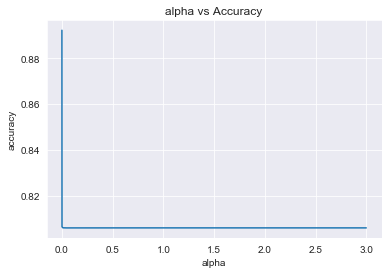

In [1486]:
#plot between alpha and accuracy

alpha_list=[0.000001,0.001,0.01,0.05,0.1,1,3]
accuracy=[acc000,acc0,acc1,acc2,acc3,acc4,acc5]
plt.plot(alpha_list,accuracy)
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("alpha vs Accuracy")
plt.show()

### Experiment 3:

In [1487]:
X=sgemm_product_log.drop(['y','y_sigmoid','Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis=1)

In [1488]:
y_log=sgemm_product_log['y_sigmoid']
y_log

0         1
1         0
2         0
3         0
4         1
         ..
241595    0
241596    0
241597    0
241598    0
241599    0
Name: y_sigmoid, Length: 233042, dtype: int64

In [1489]:
X_random_log=X.sample(10,axis=1,random_state=32)
X_random_log

,MWG,SB,KWG,SA,VWN,NWG,STRM,NDIMC,MDIMC,VWM
0,16,0,16,0,1,16,0,8,8,1
1,16,1,16,0,1,16,0,8,8,1
2,16,0,16,1,1,16,0,8,8,1
3,16,1,16,1,1,16,0,8,8,1
4,16,0,16,0,1,16,0,8,8,1
...,...,...,...,...,...,...,...,...,...,...
241595,128,1,32,1,4,128,1,32,32,4
241596,128,0,32,0,4,128,1,32,32,4
241597,128,1,32,0,4,128,1,32,32,4
241598,128,0,32,1,4,128,1,32,32,4


In [1490]:

X_train, X_test, y_train, y_test = train_test_split(X_random_log, y_log, test_size=0.3, random_state=42)
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

XTrainMatrix=np.array(X_train)
yTrainMatrix=np.array(y_train)
XTestMatrix=np.array(X_test)
yTestMatrix=np.array(y_test)

X_train_norm=normaliseData(XTrainMatrix)
X_train_norm=np.hstack((np.ones((X_train_norm.shape[0],1)),X_train_norm))
print(X_train_norm)
X_test_norm=normaliseData(XTestMatrix)
X_test_norm=np.hstack((np.ones((X_test_norm.shape[0],1)),X_test_norm))
print(X_test_norm)

XtrainMatrix= np.matrix(X_train_norm) 
yTrain = np.matrix(yTrainMatrix).T

XtestMatrix = np.matrix(X_test_norm)  
yTest = np.matrix(yTestMatrix).T

X_train shape:  (163129, 10)
y_train shape:  (163129,)
X_test shape:  (69913, 10)
y_test shape:  (69913,)
[[ 1.         -1.10658022  1.02110804 ... -0.77169254 -0.77225085
  -0.73564658]
 [ 1.         -1.10658022  1.02110804 ... -0.77169254 -0.77225085
  -0.21710392]
 [ 1.          1.15963913 -0.9793283  ...  0.23635058  0.23668316
   0.8199814 ]
 ...
 [ 1.         -0.35117377 -0.9793283  ... -0.77169254  0.23668316
   0.8199814 ]
 [ 1.          1.15963913  1.02110804 ...  0.23635058  0.23668316
   0.8199814 ]
 [ 1.         -0.35117377 -0.9793283  ... -0.77169254  2.25455116
  -0.73564658]]
[[ 1.         -1.49374487  1.01878525 ... -0.77528177  0.23034031
  -0.73838992]
 [ 1.         -1.49374487 -0.98156112 ...  2.24641974 -0.7750778
  -0.73838992]
 [ 1.         -1.11640098 -0.98156112 ... -0.77528177  0.23034031
  -0.73838992]
 ...
 [ 1.         -1.11640098 -0.98156112 ... -0.77528177  0.23034031
  -0.2201538 ]
 [ 1.         -0.36171321  1.01878525 ...  2.24641974 -0.7750778
  -0.2201

In [1491]:
iterations=1000
theta=np.ones((XtrainMatrix.shape[1],1)).T
alpha=0.000001
theta,trainCost_log,testCost_log = logistic_regression1(X_train_norm, y_train,alpha,iterations,threshold)
final_scores = np.dot(X_train_norm, theta)
preds = np.round(sigmoid(final_scores))
acc_rnd=(preds == y_train).sum().astype(float) / len(preds)
print ("accuracy at alpha 0.001 for random chosen variables",acc_rnd)

accuracy at alpha 0.001 for random chosen variables 0.8923122191639745


In [1492]:
#accuracy of alpha at 0.000001 with all the variables
acc000

0.8922693083387994

In [1493]:
(0.8922693083387994-0.8923122191639745)/0.8922693083387994

-4.80917866098607e-05

#### -4.80917866098607e-03% change in the accuracy of random chosen variables with all the variables

### Experiment 4:

In [1495]:
X=sgemm_product_log.drop(['y','y_sigmoid','Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis=1)

In [1496]:
X.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB'],
      dtype='object')

In [1499]:
X

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0


In [1529]:
x_choosen=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN']
X_choosen=X[x_choosen]
X_choosen

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN
0,16,16,16,8,8,8,8,2,1,1
1,16,16,16,8,8,8,8,2,1,1
2,16,16,16,8,8,8,8,2,1,1
3,16,16,16,8,8,8,8,2,1,1
4,16,16,16,8,8,8,8,2,1,1
...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4
241596,128,128,32,32,32,32,32,8,4,4
241597,128,128,32,32,32,32,32,8,4,4
241598,128,128,32,32,32,32,32,8,4,4


In [1530]:

X_train, X_test, y_train, y_test = train_test_split(X_choosen, y_log, test_size=0.3, random_state=42)
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

XTrainMatrix=np.array(X_train)
yTrainMatrix=np.array(y_train)
XTestMatrix=np.array(X_test)
yTestMatrix=np.array(y_test)

X_train_norm=normaliseData(XTrainMatrix)
X_train_norm=np.hstack((np.ones((X_train_norm.shape[0],1)),X_train_norm))
print(X_train_norm)
X_test_norm=normaliseData(XTestMatrix)
X_test_norm=np.hstack((np.ones((X_test_norm.shape[0],1)),X_test_norm))
print(X_test_norm)

XtrainMatrix= np.matrix(X_train_norm) 
yTrain = np.matrix(yTrainMatrix).T

XtestMatrix = np.matrix(X_test_norm)  
yTest = np.matrix(yTestMatrix).T

X_train shape:  (163129, 10)
y_train shape:  (163129,)
X_test shape:  (69913, 10)
y_test shape:  (69913,)
[[ 1.         -1.10658022  1.15309672 ... -0.98673051 -0.73564658
  -0.2191107 ]
 [ 1.         -1.10658022  1.15309672 ... -0.98673051 -0.21710392
  -0.2191107 ]
 [ 1.          1.15963913 -0.35576307 ... -0.98673051  0.8199814
  -0.73678456]
 ...
 [ 1.         -0.35117377  1.15309672 ... -0.98673051  0.8199814
  -0.73678456]
 [ 1.          1.15963913 -1.48740792 ... -0.98673051  0.8199814
  -0.73678456]
 [ 1.         -0.35117377  1.15309672 ... -0.98673051 -0.73564658
   0.81623702]]
[[ 1.         -1.49374487 -1.10940084 ... -0.98699684 -0.73838992
  -0.2128538 ]
 [ 1.         -1.49374487 -0.35325616 ...  1.01317447 -0.73838992
  -0.2128538 ]
 [ 1.         -1.11640098 -1.10940084 ...  1.01317447 -0.73838992
  -0.73366884]
 ...
 [ 1.         -1.11640098 -1.10940084 ... -0.98699684 -0.2201538
  -0.2128538 ]
 [ 1.         -0.36171321  1.15903321 ... -0.98699684 -0.2201538
  -0.2128538

In [1531]:
iterations=1000
theta=np.ones((XtrainMatrix.shape[1],1)).T
alpha=0.000001
theta,trainCost_log,testCost_log = logistic_regression1(X_train_norm, y_train,alpha,iterations,threshold)
final_scores = np.dot(X_train_norm, theta)
preds = np.round(sigmoid(final_scores))
acc_choosen=(preds == y_train).sum().astype(float) / len(preds)
print ("accuracy at alpha 0.000001 for random chosen variables",acc_choosen)

accuracy at alpha 0.000001 for random chosen variables 0.8856365207902948
